### 1. Data Cleaning

#### 1.1 Date fields

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime
import math
import scipy.stats as stats
import warnings 
import matplotlib
import matplotlib.cm as cm
sns.set(rc={'figure.figsize':(12,6)})
warnings.simplefilter(action='ignore', category= FutureWarning)
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [90]:
# reading the csv file
df = pd.read_csv('logbook_assignment1.csv')
df.head()

/tmp/ipykernel_987/247795474.py:2: DtypeWarning: Columns (3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('logbook_assignment1.csv')


,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url
0,"Cooling System, Heating System, Lights, Spark ...",Apr 7 2022,"73,370",NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...
1,Nov 7 2012,Aug 30 2016,"11,983",12.120,$5.599,$67.86,31.6,NaN,https://www.somewebsite.com/bmw/x3/2009/461150
2,Sep 22 2012,Sep 28 2012,"98,233",7.991,£5.45,£43.53,28.5,NaN,https://www.somewebsite.com/mercedes-benz/e300...
3,May 4 2019,May 4 2019,"163,802",10.575,£5.11,£54.00,46.8,NaN,https://www.somewebsite.com/bmw/320d/2010/247233
4,Feb 15 2022,Feb 15 2022,NaN,11.651,$3.029,$35.29,21.0,244.4,https://www.somewebsite.com/honda/passport/201...


In [91]:
df.dtypes

date_fueled        object
date_captured      object
odometer           object
gallons            object
cost_per_gallon    object
total_spent        object
mpg                object
miles              object
user_url           object
dtype: object

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174870 entries, 0 to 1174869
Data columns (total 9 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   date_fueled      1125665 non-null  object
 1   date_captured    1174870 non-null  object
 2   odometer         1025716 non-null  object
 3   gallons          1100660 non-null  object
 4   cost_per_gallon  1094110 non-null  object
 5   total_spent      1100660 non-null  object
 6   mpg              1100660 non-null  object
 7   miles            146274 non-null   object
 8   user_url         1174870 non-null  object
dtypes: object(9)
memory usage: 80.7+ MB


1. Identify what percentage of date fueled entries that are not proper dates.
[1]

In [93]:
valid_dates = pd.to_datetime(df['date_fueled'], format='%b %d %Y', errors='coerce').notna()
perc_invalid_dates = sum(valid_dates == False)/len(df)*100
print('Percentage of date_fueled entries not proper dates:', perc_invalid_dates, '%')

Percentage of date_fueled entries not proper dates: 11.678738924306518 %


2. If date fueled is not entered correctly (or is not a date), and the date
captured is a valid date, then fill in this value as a proxy. [1]

In [94]:
valid_ = pd.to_datetime(df['date_captured'], format='%b %d %Y', errors='coerce').notna()
val_cap = sum(valid_ == True)/len(df)*100
print('Percent of valid dates in date_captured:', val_cap)

Percent of valid dates in date_captured: 100.0


In [95]:
df['date_fueled'] = np.where((pd.to_datetime(df['date_fueled'], format='%b %d %Y', errors='coerce').notna() == False),df['date_captured'],df['date_fueled'])
df['date_fueled']

0           Apr 7 2022
1           Nov 7 2012
2          Sep 22 2012
3           May 4 2019
4          Feb 15 2022
              ...     
1174865    Feb 19 2020
1174866     Dec 6 2019
1174867     Oct 4 2021
1174868    Jul 26 2021
1174869    Mar 12 2019
Name: date_fueled, Length: 1174870, dtype: object

3. Convert the column to a date format, setting any invalid date fueled entries
to NaT. [2]

In [96]:
df['date_fueled'] = pd.to_datetime(df['date_fueled'], format='%b %d %Y', errors='coerce')

df['date_captured'] = pd.to_datetime(df['date_captured'], format='%b %d %Y', errors='coerce')

df.dtypes

date_fueled        datetime64[ns]
date_captured      datetime64[ns]
odometer                   object
gallons                    object
cost_per_gallon            object
total_spent                object
mpg                        object
miles                      object
user_url                   object
dtype: object

In [97]:
df.sample(15)

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url
700784,2010-10-28,2010-10-29,"34,374",19.020,€5.64,€107.20,13.0,NaN,https://www.somewebsite.com/volkswagen/transpo...
718778,2019-06-22,2019-06-22,"246,007",10.742,$2.999,$32.22,22.0,NaN,https://www.somewebsite.com/lexus/ls400/1996/8...
837864,2019-10-05,2019-10-15,"78,837",12.950,€5.41,€70.05,22.7,NaN,https://www.somewebsite.com/mercedes-benz/a/20...
474061,2019-11-10,2019-12-30,"86,965",20.550,CA$5.83,CA$119.72,14.1,NaN,https://www.somewebsite.com/bmw/x5/2007/917927
407613,2019-01-03,2019-01-03,NaN,27.056,R51.67,"R1,398.01",25.7,694.7,https://www.somewebsite.com/isuzu/250d/1998/84...
873943,2022-02-18,2022-02-18,"74,024",4.484,$4.449,$19.95,0.0,NaN,https://www.somewebsite.com/bmw/325i/2004/882438
325548,2022-04-10,2022-04-10,"59,058",11.115,$4.839,$53.79,30.0,NaN,https://www.somewebsite.com/mini/cooper/2019/9...
203002,2014-01-05,2014-01-05,NaN,13.000,$3.310,$43.03,7.2,93.6,https://www.somewebsite.com/ford/customline/19...
591376,2021-03-31,2021-03-31,"67,485",13.707,$2.740,$37.56,31.5,NaN,https://www.somewebsite.com/bmw/328d_xdrive/20...
550941,2020-05-20,2020-05-20,"163,495",NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/lexus/lx470/2002/9...


4. Remove dates that are in the future, or dates that are earlier than 2005.
[1]


In [98]:
print("Before removing invalid dates, the shape of the dataframe is:", df.shape)

df = df.loc[(df['date_fueled'] >= '2005-01-01') & (df['date_fueled'] <= datetime.datetime.now())]

print("After removing invalid dates, the shape of the dataframe is:", df.shape)

Before removing invalid dates, the shape of the dataframe is: (1174870, 9)
After removing invalid dates, the shape of the dataframe is: (1174300, 9)


In [99]:
print("Min Date: ", min(df['date_fueled']))

print("Max Date: ", max(df['date_fueled']))

df.shape

Min Date:  2005-01-02 00:00:00
Max Date:  2025-08-09 00:00:00


(1174300, 9)

5. Plot the distribution of fueling dates and comment on the results. [2]

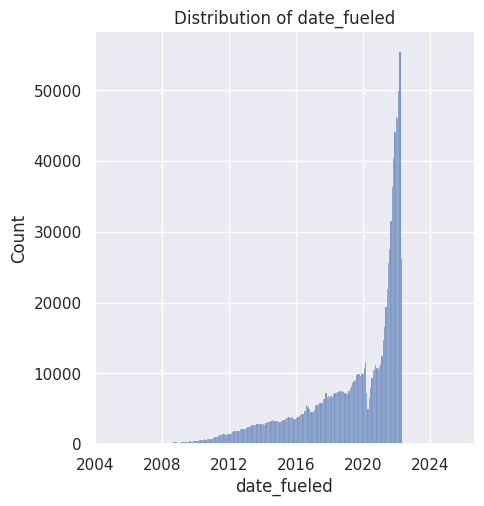

In [100]:
sns.displot(df, x="date_fueled")
plt.title("Distribution of date_fueled")
plt.show()

#### 1.2 Numeric Fields

1. Identify what percentage of gallons, miles, and odometer entries are
missing. [3]

In [101]:
(df[['gallons', 'miles', 'odometer', 'mpg']].isna().sum()/len(df))*100

gallons     6.316188367538107
miles       87.55369156092992
odometer   12.691560929915694
mpg         6.316188367538107
dtype: float64

2. The miles, gallons and mpg columns are interdependent. If one is miss-
ing, the other two can be used to calculate it. [3]

In [102]:
df.dtypes

date_fueled        datetime64[ns]
date_captured      datetime64[ns]
odometer                   object
gallons                    object
cost_per_gallon            object
total_spent                object
mpg                        object
miles                      object
user_url                   object
dtype: object

In [104]:
df[['gallons', 'miles', 'odometer', 'mpg']].isna().sum()/len(df)*100


gallons     6.316188367538107
miles       87.55369156092992
odometer   12.691560929915694
mpg         6.316188367538107
dtype: float64

In [105]:
df['miles'] = df['miles'].replace(',', '', regex=True)
df['miles'] = df['miles'].astype(float)
df['odometer'] = df['odometer'].replace(',', '', regex=True)
df['odometer'] = df['odometer'].astype(float)
df['gallons'] = df['gallons'].replace(',', '', regex=True)
df['gallons'] = df['gallons'].astype(float)
df['mpg'] = df['mpg'].replace(',', '', regex=True)
df['mpg'] = df['mpg'].astype(float)

df.dtypes

date_fueled        datetime64[ns]
date_captured      datetime64[ns]
odometer                  float64
gallons                   float64
cost_per_gallon            object
total_spent                object
mpg                       float64
miles                     float64
user_url                   object
dtype: object

In [106]:
#The formula to calculate mpg: Miles driven ÷ gallons used to refill the tank
df['mpg'] = df['mpg'].fillna(df['miles']/df['gallons'])

#Formula for Miles: mpg*gallons
df['miles'] = df['miles'].fillna(df['mpg']*df['gallons'])

#Formula for gallons: miles/mpg
df['gallons'] = df['gallons'].fillna(df['miles']/df['mpg'])

df[['gallons', 'miles', 'mpg']].isna().sum()/len(df)*100

gallons   6.316188367538107
miles     6.316188367538107
mpg       6.316188367538107
dtype: float64

3. The values will be read in as objects (or strings) by Pandas. Convert these
values to float (note the point above about commas in the value). [5]

In [107]:
df['miles'] = df['miles'].replace(',', '', regex=True)
df['miles'] = df['miles'].astype(float)
df['odometer'] = df['odometer'].replace(',', '', regex=True)
df['odometer'] = df['odometer'].astype(float)
df['gallons'] = df['gallons'].replace(',', '', regex=True)
df['gallons'] = df['gallons'].astype(float)
df['mpg'] = df['mpg'].replace(',', '', regex=True)
df['mpg'] = df['mpg'].astype(float)

df.dtypes

date_fueled        datetime64[ns]
date_captured      datetime64[ns]
odometer                  float64
gallons                   float64
cost_per_gallon            object
total_spent                object
mpg                       float64
miles                     float64
user_url                   object
dtype: object

4. Plot the distributions and comment on the distributions. [3]

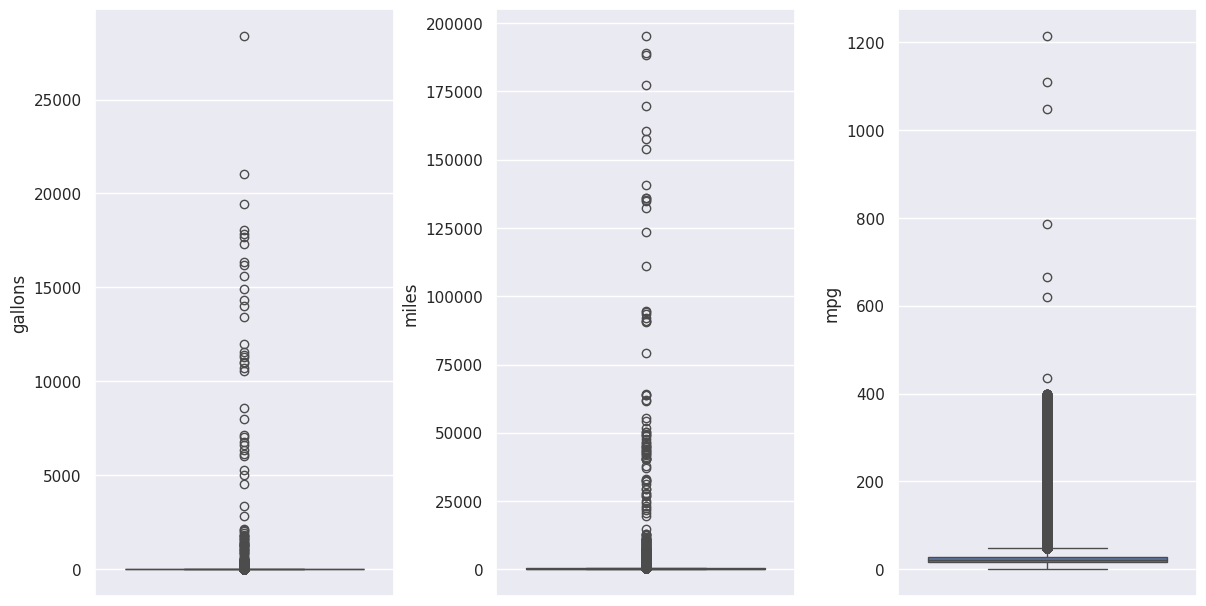

In [108]:
data_m_g_mpg = df[['gallons', 'miles', 'mpg']]
fig, axs = plt.subplots(ncols=3, nrows=1)
index = 0
axs = axs.flatten()
for k,v in data_m_g_mpg.items():
    sns.boxplot(y=k, data=data_m_g_mpg, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

5. Compute the statistical description of the columns: mean, standard de-
viation, max, min, most frequent, and quartiles. Do these results make
sense? [3]

In [111]:
# suppressing scientific notation when printing float values
pd.options.display.float_format = '{}'.format

df[['miles', 'gallons', 'mpg']].describe()

,miles,gallons,mpg
count,1100129.0,1100129.0,1100129.0
mean,269.4538013011202,12.797430474971572,22.163024699830657
std,725.7634370035393,74.48279111437778,15.744350144205045
min,0.0,0.0,0.0
25%,181.4,8.99,15.6
50%,267.0486,11.954,21.8
75%,342.7641,14.939,28.5
max,195321.2,28380.0,1214.3


These descriptions show that the mean for gallons is approximately 13 which makes sense, as I have mentioned that an average sized tank can hold between 12 to 18 gallons of fuel. There are clearly some extremes which do not make sense in this column. As we can see the maximum gallons is 28380, which seems highly unlikely for a car to be filled with that many gallons of fuel.

For mpg, the values make sense in relation to the values of miles and gallons. In reality, an average car (based in USA) gets an average of 25mpg. The average mpg here is 22 which is very close to 25, thus it makes sense in this aspect as well.

For miles, the average is 269 miles. This makes sense in relation to the average of 22mpg. If a car rides 269 miles based on 22mpg, on average they would consume 12-13 gallons of fuel. The maximum miles driven is 195321 miles. In relation to the extreme max value of gallons, this makes sense.

### 2 Feature engineering

1. Create a new column with the currency. (Something to keep in mind is
that the Swiss Franc has a period in the abbreviation). [2]


In [112]:
df['Currency'] = df['total_spent'].astype(str).str.extract(r'([^\d.,]+)')

In [113]:
df['Currency'].value_counts()


Currency
$      741953
£       87587
nan     74171
€       59273
CA$     46848
        ...  
TMT        11
CV$        11
KGS         9
L$          9
IQD         8
Name: count, Length: 121, dtype: int64

In [114]:
df.head()

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,Currency
0,2022-04-07,2022-04-07,73370.0,NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...,nan
1,2012-11-07,2016-08-30,11983.0,12.12,$5.599,$67.86,31.6,382.992,https://www.somewebsite.com/bmw/x3/2009/461150,$
2,2012-09-22,2012-09-28,98233.0,7.991,£5.45,£43.53,28.5,227.74349999999998,https://www.somewebsite.com/mercedes-benz/e300...,£
3,2019-05-04,2019-05-04,163802.0,10.575,£5.11,£54.00,46.8,494.9099999999999,https://www.somewebsite.com/bmw/320d/2010/247233,£
4,2022-02-15,2022-02-15,NaN,11.651,$3.029,$35.29,21.0,244.4,https://www.somewebsite.com/honda/passport/201...,$


2. Create a new column containing the float value of the total spend and the
cost per gallon. (Swiss Franc comment as above). [2]


In [115]:
df["float_tot_spent"] = df["total_spent"].str.extract("(\d*\.?\d+)", expand=True)
df.head()

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,Currency,float_tot_spent
0,2022-04-07,2022-04-07,73370.0,NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...,nan,NaN
1,2012-11-07,2016-08-30,11983.0,12.12,$5.599,$67.86,31.6,382.992,https://www.somewebsite.com/bmw/x3/2009/461150,$,67.86
2,2012-09-22,2012-09-28,98233.0,7.991,£5.45,£43.53,28.5,227.74349999999998,https://www.somewebsite.com/mercedes-benz/e300...,£,43.53
3,2019-05-04,2019-05-04,163802.0,10.575,£5.11,£54.00,46.8,494.9099999999999,https://www.somewebsite.com/bmw/320d/2010/247233,£,54.00
4,2022-02-15,2022-02-15,NaN,11.651,$3.029,$35.29,21.0,244.4,https://www.somewebsite.com/honda/passport/201...,$,35.29


In [116]:
df['float_cpg'] = df['cost_per_gallon'].str.extract("(\d*\.?\d+)", expand=True)
df.head()

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,Currency,float_tot_spent,float_cpg
0,2022-04-07,2022-04-07,73370.0,NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...,nan,NaN,NaN
1,2012-11-07,2016-08-30,11983.0,12.12,$5.599,$67.86,31.6,382.992,https://www.somewebsite.com/bmw/x3/2009/461150,$,67.86,5.599
2,2012-09-22,2012-09-28,98233.0,7.991,£5.45,£43.53,28.5,227.74349999999998,https://www.somewebsite.com/mercedes-benz/e300...,£,43.53,5.45
3,2019-05-04,2019-05-04,163802.0,10.575,£5.11,£54.00,46.8,494.9099999999999,https://www.somewebsite.com/bmw/320d/2010/247233,£,54.00,5.11
4,2022-02-15,2022-02-15,NaN,11.651,$3.029,$35.29,21.0,244.4,https://www.somewebsite.com/honda/passport/201...,$,35.29,3.029


In [117]:
df.dtypes

date_fueled        datetime64[ns]
date_captured      datetime64[ns]
odometer                  float64
gallons                   float64
cost_per_gallon            object
total_spent                object
mpg                       float64
miles                     float64
user_url                   object
Currency                   object
float_tot_spent            object
float_cpg                  object
dtype: object

In [118]:
df['float_cpg'] = df['float_cpg'].astype(float)
df["float_tot_spent"] = df["float_tot_spent"].astype(float)
df.dtypes

date_fueled        datetime64[ns]
date_captured      datetime64[ns]
odometer                  float64
gallons                   float64
cost_per_gallon            object
total_spent                object
mpg                       float64
miles                     float64
user_url                   object
Currency                   object
float_tot_spent           float64
float_cpg                 float64
dtype: object

3. Car make, model, year, User ID: use the url (the last value in the URL is
the user ID) [4]


In [119]:
with pd.option_context('display.max_colwidth', None):
    display(df['user_url'].head(10))

0          https://www.somewebsite.com/suzuki/swift/2015/674857
1                https://www.somewebsite.com/bmw/x3/2009/461150
2    https://www.somewebsite.com/mercedes-benz/e300/1998/133501
3              https://www.somewebsite.com/bmw/320d/2010/247233
4       https://www.somewebsite.com/honda/passport/2019/1038865
5     https://www.somewebsite.com/volkswagen/passat/2004/445811
6         https://www.somewebsite.com/mazda/3_sport/2010/529810
7      https://www.somewebsite.com/subaru/forester/2020/1087864
8              https://www.somewebsite.com/kianival/2009/789684
9           https://www.somewebsite.com/lexus/rx350/2012/898688
Name: user_url, dtype: object

In [120]:
df['car_make'] = df['user_url'].str.split('/').str[3]
df['car_model'] = df['user_url'].str.split('/').str[4]
df['car_year'] = df['user_url'].str.split('/').str[5]
df['user_ID'] = df['user_url'].str.split('/').str[-1]

#reorder columns
columns = ['user_ID', 'date_fueled', 'date_captured', 'odometer', 'gallons','cost_per_gallon', 'float_cpg', 'total_spent','Currency','float_tot_spent', 'mpg', 'miles', 'user_url','car_make', 'car_model', 'car_year']
df = df.reindex(columns=columns)

In [121]:
df.head()

,user_ID,date_fueled,date_captured,odometer,gallons,cost_per_gallon,float_cpg,total_spent,Currency,float_tot_spent,mpg,miles,user_url,car_make,car_model,car_year
0,674857,2022-04-07,2022-04-07,73370.0,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...,suzuki,swift,2015
1,461150,2012-11-07,2016-08-30,11983.0,12.12,$5.599,5.599,$67.86,$,67.86,31.6,382.992,https://www.somewebsite.com/bmw/x3/2009/461150,bmw,x3,2009
2,133501,2012-09-22,2012-09-28,98233.0,7.991,£5.45,5.45,£43.53,£,43.53,28.5,227.74349999999998,https://www.somewebsite.com/mercedes-benz/e300...,mercedes-benz,e300,1998
3,247233,2019-05-04,2019-05-04,163802.0,10.575,£5.11,5.11,£54.00,£,54.0,46.8,494.9099999999999,https://www.somewebsite.com/bmw/320d/2010/247233,bmw,320d,2010
4,1038865,2022-02-15,2022-02-15,NaN,11.651,$3.029,3.029,$35.29,$,35.29,21.0,244.4,https://www.somewebsite.com/honda/passport/201...,honda,passport,2019


The data is given in imperial units, and in SA, we use proper measurement
standards.
1. litres filled: use the gallons - consider whether to use UK or US gallons.
[2]

In [122]:
# Formula to convert to litres from gallons: gallons*3.785411784
# US Standard: 1 US liquid gallon = 3,78541 Liter
# UK Standard: 1 UK Gallon  = 4.54609 Litres

df['litres_filled'] = df['gallons']*3.785411784

2. km driven: use the miles driven to compute this [1]

In [124]:
# Formula to convert from miles to km: miles*1.6
df['km_driven'] = df['miles']*1.6


3. litres per 100km: use the two new features to calculate this. [1]

In [125]:
# Formula for litres per 100km: (litres_filled/km_driven)*100
df['litres_per_100km'] = (df['litres_filled']/df['km_driven'])*100

In [126]:
df.head()

,user_ID,date_fueled,date_captured,odometer,gallons,cost_per_gallon,float_cpg,total_spent,Currency,float_tot_spent,mpg,miles,user_url,car_make,car_model,car_year,litres_filled,km_driven,litres_per_100km
0,674857,2022-04-07,2022-04-07,73370.0,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...,suzuki,swift,2015,NaN,NaN,NaN
1,461150,2012-11-07,2016-08-30,11983.0,12.12,$5.599,5.599,$67.86,$,67.86,31.6,382.992,https://www.somewebsite.com/bmw/x3/2009/461150,bmw,x3,2009,45.87919082208,612.7872000000001,7.48696950949367
2,133501,2012-09-22,2012-09-28,98233.0,7.991,£5.45,5.45,£43.53,£,43.53,28.5,227.74349999999998,https://www.somewebsite.com/mercedes-benz/e300...,mercedes-benz,e300,1998,30.249225565944,364.3896,8.301341631578946
3,247233,2019-05-04,2019-05-04,163802.0,10.575,£5.11,5.11,£54.00,£,54.0,46.8,494.9099999999999,https://www.somewebsite.com/bmw/320d/2010/247233,bmw,320d,2010,40.0307296158,791.8559999999999,5.055304198717949
4,1038865,2022-02-15,2022-02-15,NaN,11.651,$3.029,3.029,$35.29,$,35.29,21.0,244.4,https://www.somewebsite.com/honda/passport/201...,honda,passport,2019,44.103832695384,391.04,11.278598786667347


In [127]:
df.dtypes

user_ID                     object
date_fueled         datetime64[ns]
date_captured       datetime64[ns]
odometer                   float64
gallons                    float64
cost_per_gallon             object
float_cpg                  float64
total_spent                 object
Currency                    object
float_tot_spent            float64
mpg                        float64
miles                      float64
user_url                    object
car_make                    object
car_model                   object
car_year                    object
litres_filled              float64
km_driven                  float64
litres_per_100km           float64
dtype: object

### 3. Vehicle Exploration

1. Plot the number of unique users per country (remember, we proxy this by
currency). [2]

In [128]:
# Number of unique currencies 
df['Currency'].nunique()

121

In [129]:
len(df)

1174300

In [137]:
# Number of unique users
df['user_ID'].nunique()

120201

In [138]:
# Number of unique users per country: Unsure
unq_users_per_country = df.groupby(['user_ID', 'Currency']).Currency.count().reset_index(name='count')

In [139]:
len(unq_users_per_country)

152856

In [140]:
# Unique users per currency
unq_users_per_country['Currency'].value_counts()

Currency
$      78723
nan    32933
£      10847
€       6758
CA$     5074
       ...  
L$         1
CU$        1
YR         1
TMT        1
KGS        1
Name: count, Length: 121, dtype: int64

In [141]:
# Users per currency
df['Currency'].value_counts()

Currency
$      741953
£       87587
nan     74171
€       59273
CA$     46848
        ...  
TMT        11
CV$        11
KGS         9
L$          9
IQD         8
Name: count, Length: 121, dtype: int64

In [142]:
# Percentage of unique users
df['user_ID'].nunique()/len(df) * 100

10.235970365324022

In [143]:
# Unique currencies
df['Currency'].unique()

array(['nan', '$', '£', 'RON', '€', 'NZ$', 'zł', 'AU$', '₩', 'Ft', 'Nkr',
       'R$', 'CA$', 'RUB', '₪', 'Rp', 'RM', 'R', 'Skr', 'AR$', 'TL',
       'din', 'Ikr', '฿', 'CN¥', 'HK$', 'Dkr', '₡', '₴', 'IRR', 'S$',
       'Rs', 'BGN', '¥', 'AED', 'MKD', '₱', 'BD', 'CL$', 'EC$', '$U',
       'LE', 'MXN', 'CO$', 'CFPF', 'Kč', 'kn', 'JD', 'FCFA', 'NT$', 'BN$',
       'RD$', 'S/', 'J$', 'PKRs', 'Ksh', 'GY$', 'KM', 'Fr', 'CFA', 'MDL',
       'MMK', 'N$', '₦', 'ZWL', 'USh', 'MURs', 'BYN', 'TT$', 'KD', 'B/',
       'Bs', 'SLRs', 'SR', 'GTQ', 'QR', 'Br', 'C$', 'BWP', 'GH₵', 'Tk',
       'SR$', 'man', 'KHR', 'BZ$', 'Bds$', 'Kz', 'NPRs', 'OMR', '₲',
       'LB£', 'HNL', 'AMD', 'GEL', '₮', 'MTn', 'ZMW', 'SH£', '₫', 'RWF',
       'MGA', 'DT', 'VT', 'MOP$', 'TMT', 'SY£', 'BS$', 'Af', 'ALL', 'DA',
       'TSh', 'KY$', 'NAf', 'KZT', 'YR', 'MAD', 'CV$', 'IQD', 'CU$',
       'KGS', 'L$'], dtype=object)

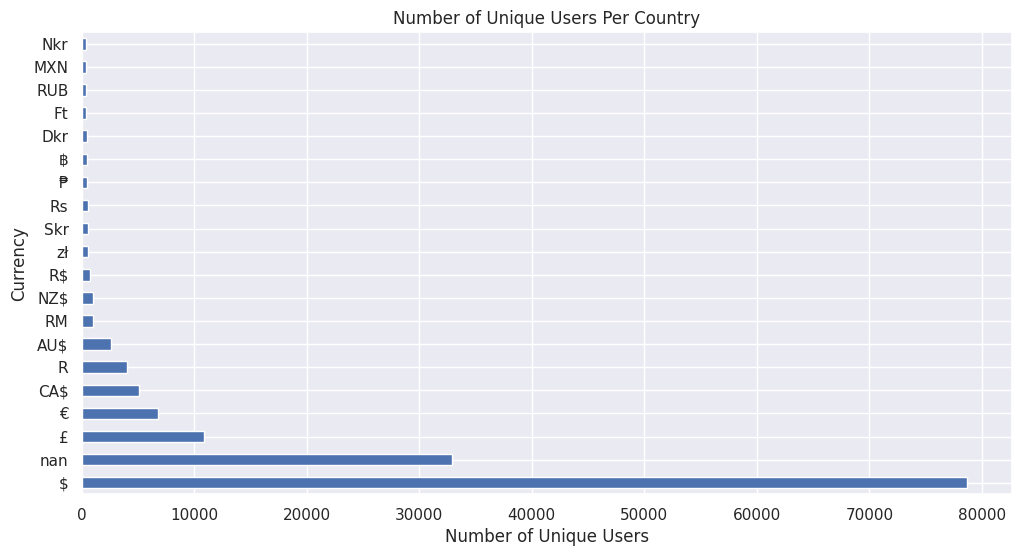

In [144]:
unq_users_per_country['Currency'].value_counts()[:20].plot(kind='barh')
plt.title("Number of Unique Users Per Country")
plt.xlabel("Number of Unique Users")
plt.ylabel("Currency")
plt.show()

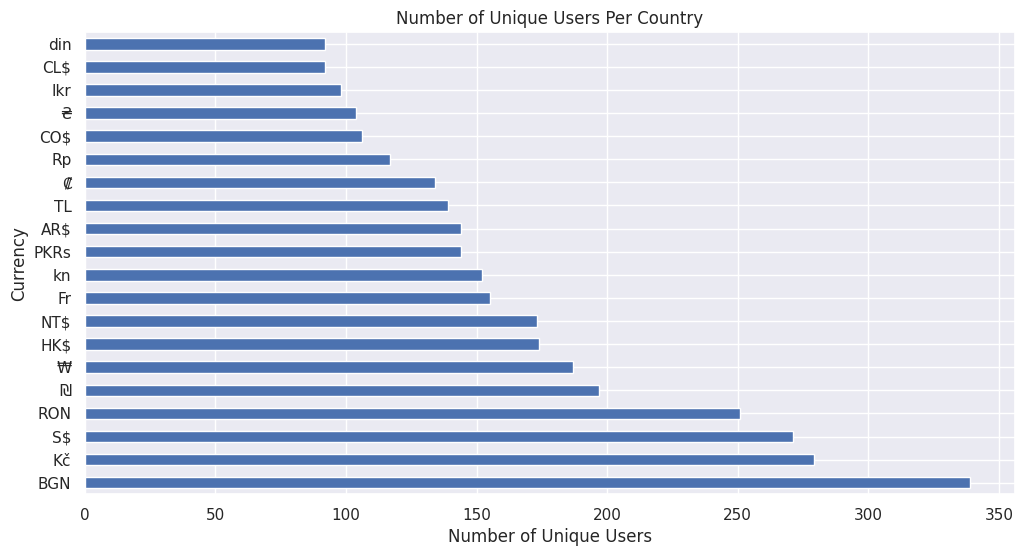

In [145]:
unq_users_per_country['Currency'].value_counts()[20:40].plot(kind='barh')
plt.title("Number of Unique Users Per Country")
plt.xlabel("Number of Unique Users")
plt.ylabel("Currency")
plt.show()

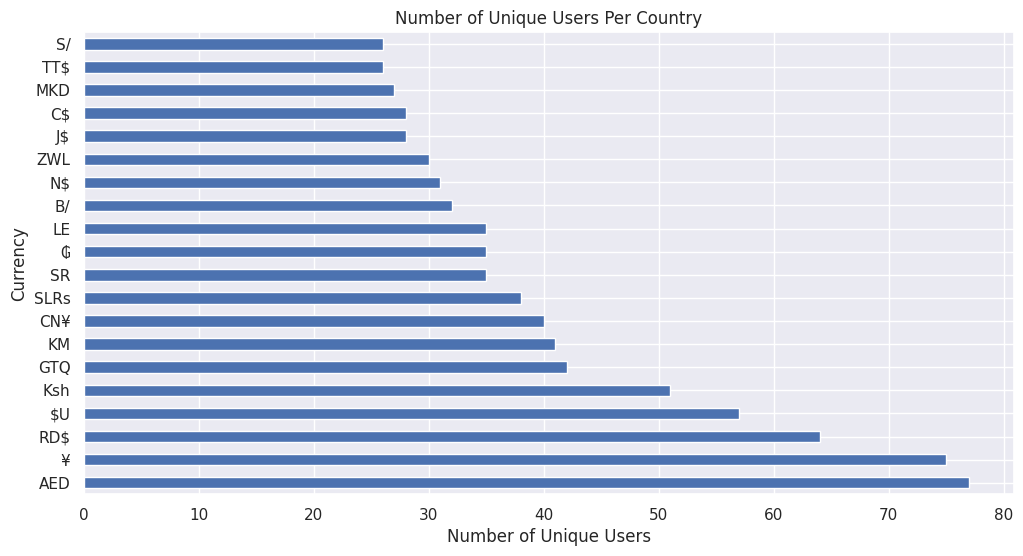

In [146]:
unq_users_per_country['Currency'].value_counts()[40:60].plot(kind='barh')
plt.title("Number of Unique Users Per Country")
plt.xlabel("Number of Unique Users")
plt.ylabel("Currency")
plt.show()

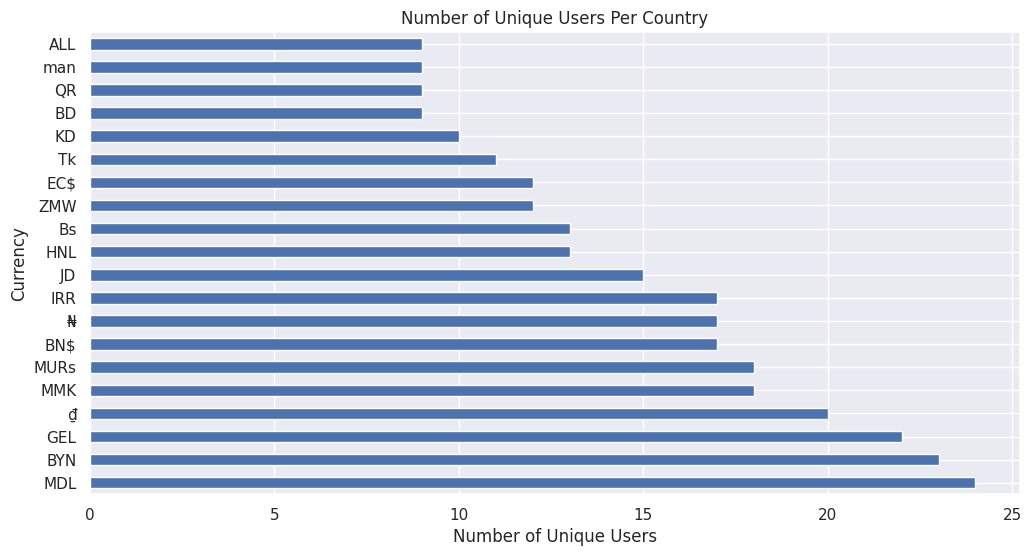

In [147]:
unq_users_per_country['Currency'].value_counts()[60:80].plot(kind='barh')
plt.title("Number of Unique Users Per Country")
plt.xlabel("Number of Unique Users")
plt.ylabel("Currency")
plt.show()

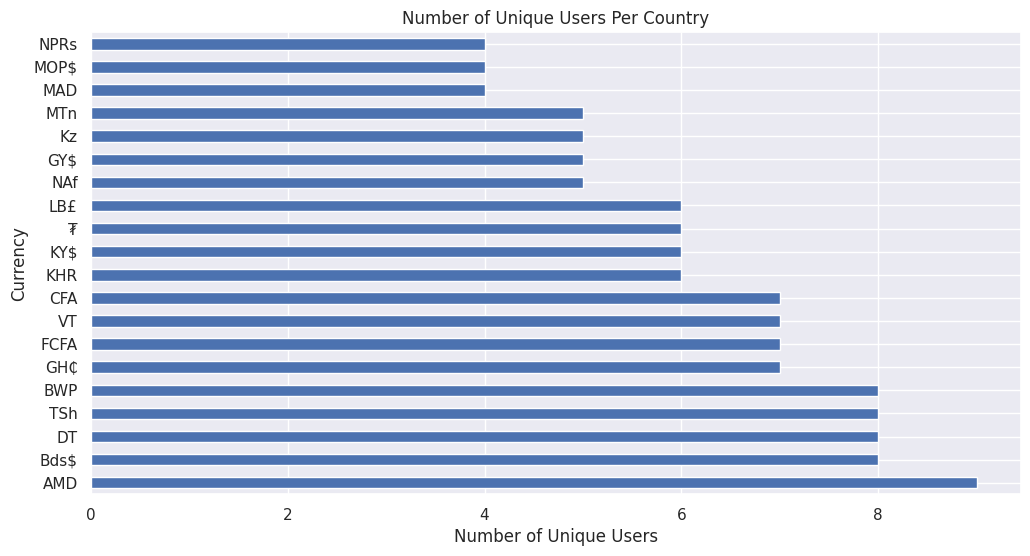

In [148]:
unq_users_per_country['Currency'].value_counts()[80:100].plot(kind='barh')
plt.title("Number of Unique Users Per Country")
plt.xlabel("Number of Unique Users")
plt.ylabel("Currency")
plt.show()

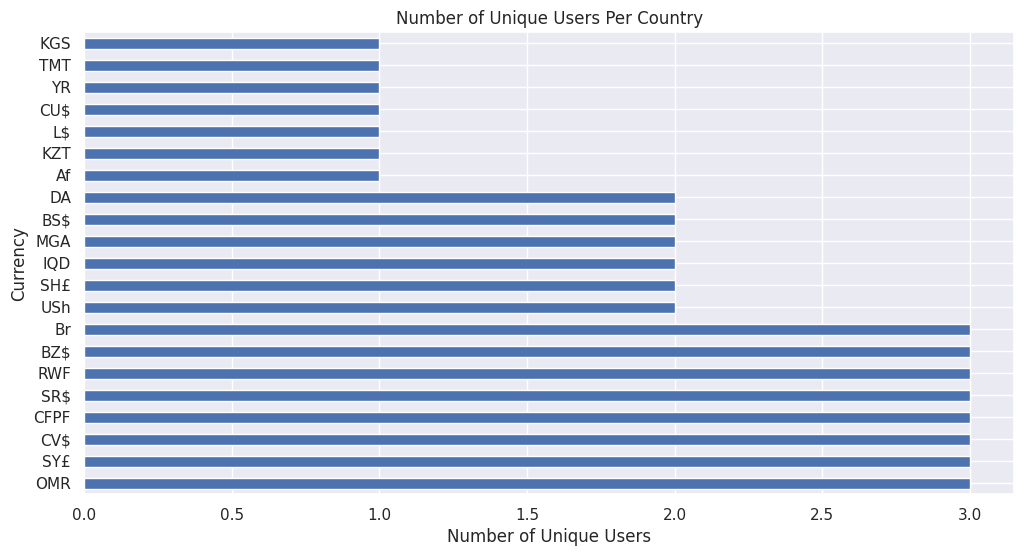

In [149]:
unq_users_per_country['Currency'].value_counts()[100:121].plot(kind='barh')
plt.title("Number of Unique Users Per Country")
plt.xlabel("Number of Unique Users")
plt.ylabel("Currency")
plt.show()

2. Look at the popularity of the app: plot the number of unique users per
day. [2]


In [150]:
df.head()

,user_ID,date_fueled,date_captured,odometer,gallons,cost_per_gallon,float_cpg,total_spent,Currency,float_tot_spent,mpg,miles,user_url,car_make,car_model,car_year,litres_filled,km_driven,litres_per_100km
0,674857,2022-04-07,2022-04-07,73370.0,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...,suzuki,swift,2015,NaN,NaN,NaN
1,461150,2012-11-07,2016-08-30,11983.0,12.12,$5.599,5.599,$67.86,$,67.86,31.6,382.992,https://www.somewebsite.com/bmw/x3/2009/461150,bmw,x3,2009,45.87919082208,612.7872000000001,7.48696950949367
2,133501,2012-09-22,2012-09-28,98233.0,7.991,£5.45,5.45,£43.53,£,43.53,28.5,227.74349999999998,https://www.somewebsite.com/mercedes-benz/e300...,mercedes-benz,e300,1998,30.249225565944,364.3896,8.301341631578946
3,247233,2019-05-04,2019-05-04,163802.0,10.575,£5.11,5.11,£54.00,£,54.0,46.8,494.9099999999999,https://www.somewebsite.com/bmw/320d/2010/247233,bmw,320d,2010,40.0307296158,791.8559999999999,5.055304198717949
4,1038865,2022-02-15,2022-02-15,NaN,11.651,$3.029,3.029,$35.29,$,35.29,21.0,244.4,https://www.somewebsite.com/honda/passport/201...,honda,passport,2019,44.103832695384,391.04,11.278598786667347


In [151]:
un_users_per_day = df.groupby(['user_ID', 'date_captured']).date_captured.count().reset_index(name='count')

<Axes: xlabel='date_captured', ylabel='count'>

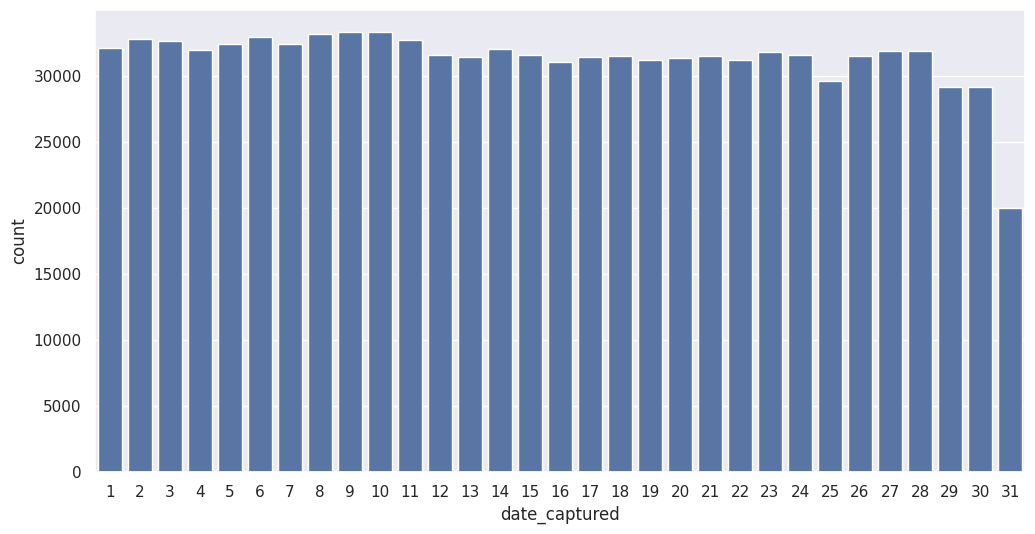

In [152]:
sns.countplot(x=un_users_per_day['date_captured'].dt.day, data=un_users_per_day)

The number of unique users per day is generally lower for the 31st and the highest from the 8th to the 10th

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1174300 entries, 0 to 1174869
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   user_ID           1174300 non-null  object        
 1   date_fueled       1174300 non-null  datetime64[ns]
 2   date_captured     1174300 non-null  datetime64[ns]
 3   odometer          1025263 non-null  float64       
 4   gallons           1100129 non-null  float64       
 5   cost_per_gallon   1093581 non-null  object        
 6   float_cpg         1093581 non-null  float64       
 7   total_spent       1100129 non-null  object        
 8   Currency          1174300 non-null  object        
 9   float_tot_spent   1100129 non-null  float64       
 10  mpg               1100129 non-null  float64       
 11  miles             1100129 non-null  float64       
 12  user_url          1174300 non-null  object        
 13  car_make          1174300 non-null  object     

3. Look at the distribution of age of the vehicles per country - look at the
year of the vehicle. Remember to look at the date it was refuelled, not
the current date. [3]


In [154]:
df['car_year'] = pd.to_numeric(df['car_year'], errors='coerce')

In [155]:
df['vehicle_age'] = df['date_fueled'].dt.year - df['car_year']

In [156]:
# percent of negative values
np.sum((df['vehicle_age'] < 0).values.ravel())/len(df)

np.float64(0.005861364216980329)

In [157]:
df['vehicle_age'] = np.where(df['vehicle_age'] < 0, np.nan, df['vehicle_age'])

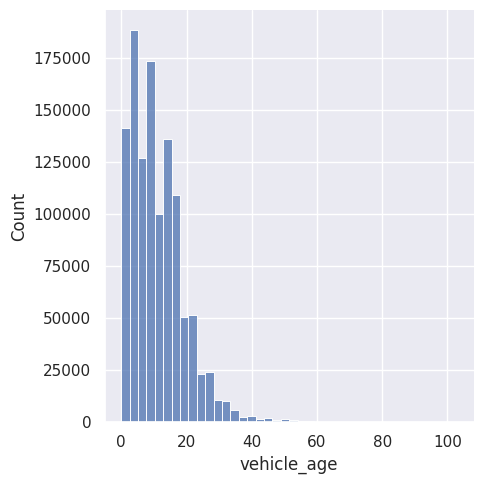

In [158]:
sns.displot(data=df, x= df['vehicle_age'], bins=40)

4. Which makes and models of vehicles are the most popular? [2]

In [161]:
most_popular_vehicle = df.groupby(['car_make', 'car_model']).car_make.count().reset_index(name='count')
most_popular_vehicle.nlargest(n=15, columns=['count'])

,car_make,car_model,count
692,honda,civic,8082
1937,toyota,4runner,7810
1972,toyota,corolla,7737
565,ford,f-150,7661
676,honda,accord,7633
627,ford,mustang,7520
642,ford,ranger,7424
2013,toyota,land_cruiser,7388
1964,toyota,camry,7316
888,jeep,wrangler,7061


### 4. Fuel Usage

#### 4.1. Outlier Removal

1. Identify the top 5 currencies by number of transactions. [2]

In [166]:
# consistency reasons - cost per gallon is converted to cost per litre
# divide fuel price (U.S. gallon) by 3.785411784 to get cost per litre
df['float_cpl'] = df['float_cpg']/3.785411784

In [174]:
# top 5 currencies with most entries
df['Currency'].value_counts().rename_axis('Currency')[:5].reset_index(name='count')

,Currency,count
0,$,741953
1,£,87587
2,€,59273
3,CA$,46848
4,R,36424


In [169]:
# Replace the string 'nan' with real NaN
df['Currency'] = df['Currency'].replace('nan', np.nan)

# Now count top 5 currencies ignoring NaNs
top_currencies = df['Currency'].value_counts(dropna=True).head(5).rename_axis('Currency').reset_index(name='count')

print(top_currencies)

  Currency   count
0        $  741953
1        £   87587
2        €   59273
3      CA$   46848
4        R   36424


In [171]:
# top 5 countries
top_5_currency_data = df[df['Currency'].isin(['$', '£', '€', 'CA$', 'R'])] 

In [172]:
len(df)

1174300

In [173]:
len(top_5_currency_data)

972085

2. For each of the top 5 currencies separately, remove outliers by considering
the total spend, litres, cost per litre, gallons, etc. Choose values you
believe are reasonable and provide your reasoning. As an example of
something you would want to look out for, there are some SA users that
have their currency set to dollars. This will show a user refuelling with
several hundred dollars, but only putting in tens of litres, which is clearly
wrong. [10]

In [175]:
df.head()

,user_ID,date_fueled,date_captured,odometer,gallons,cost_per_gallon,float_cpg,total_spent,Currency,float_tot_spent,...,miles,user_url,car_make,car_model,car_year,litres_filled,km_driven,litres_per_100km,vehicle_age,float_cpl
0,674857,2022-04-07,2022-04-07,73370.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,https://www.somewebsite.com/suzuki/swift/2015/...,suzuki,swift,2015.0,NaN,NaN,NaN,7.0,NaN
1,461150,2012-11-07,2016-08-30,11983.0,12.12,$5.599,5.599,$67.86,$,67.86,...,382.992,https://www.somewebsite.com/bmw/x3/2009/461150,bmw,x3,2009.0,45.87919082208,612.7872000000001,7.48696950949367,3.0,1.479099321153273
2,133501,2012-09-22,2012-09-28,98233.0,7.991,£5.45,5.45,£43.53,£,43.53,...,227.74349999999998,https://www.somewebsite.com/mercedes-benz/e300...,mercedes-benz,e300,1998.0,30.249225565944,364.3896,8.301341631578946,14.0,1.439737685351909
3,247233,2019-05-04,2019-05-04,163802.0,10.575,£5.11,5.11,£54.00,£,54.0,...,494.9099999999999,https://www.somewebsite.com/bmw/320d/2010/247233,bmw,320d,2010.0,40.0307296158,791.8559999999999,5.055304198717949,9.0,1.3499191875501386
4,1038865,2022-02-15,2022-02-15,NaN,11.651,$3.029,3.029,$35.29,$,35.29,...,244.4,https://www.somewebsite.com/honda/passport/201...,honda,passport,2019.0,44.103832695384,391.04,11.278598786667347,3.0,0.8001771465928316


Boxplot for outlier detection

The boxplot captures the summary of the data effectively and efficiently with only a simple box and whiskers. The whiskers can be used to represent one standard deviation from the mean, or the top and bottom percentiles which is great for highlighting outliers. In this case an outlier is defined as a data point that is located outside the whiskers of the box plot

Before removal of outliers

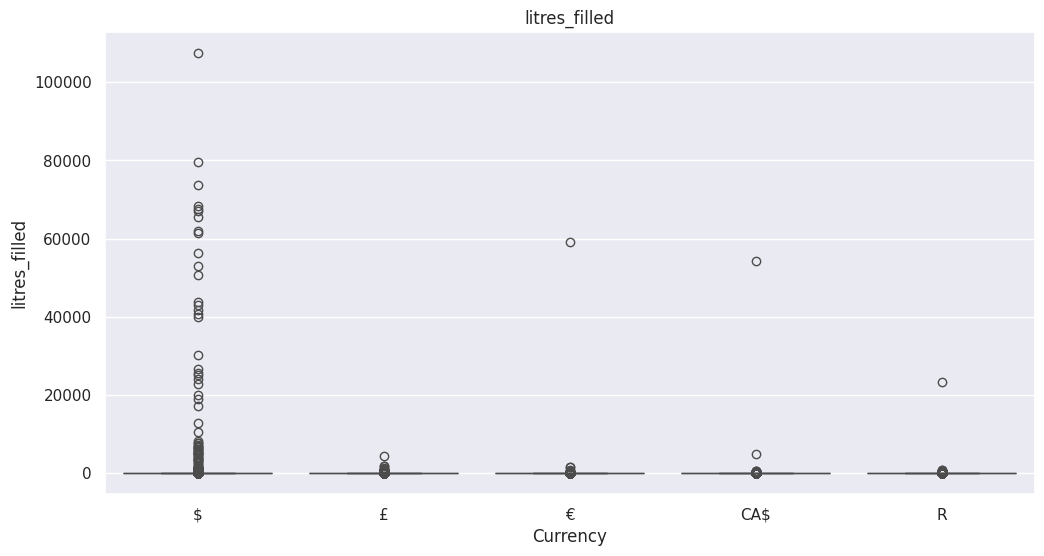

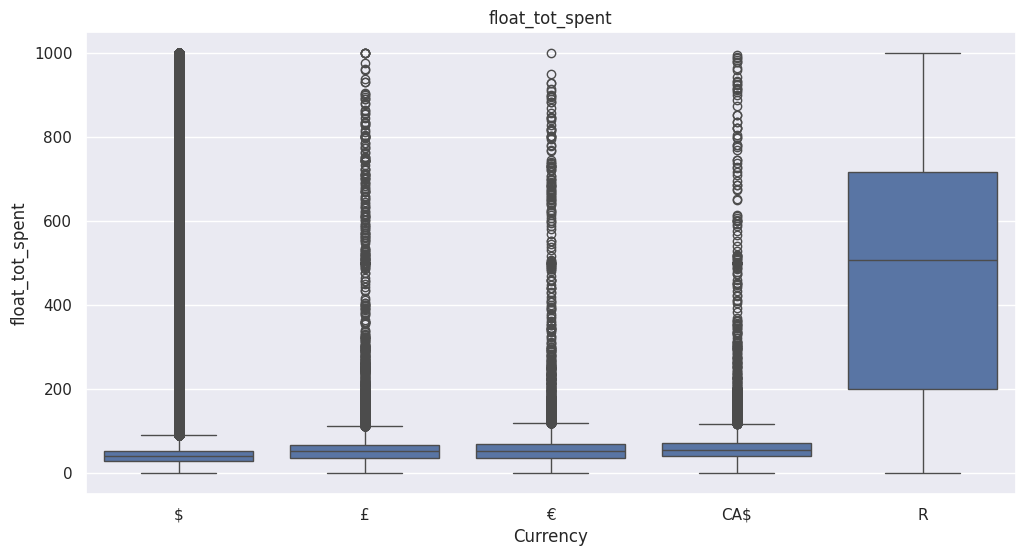

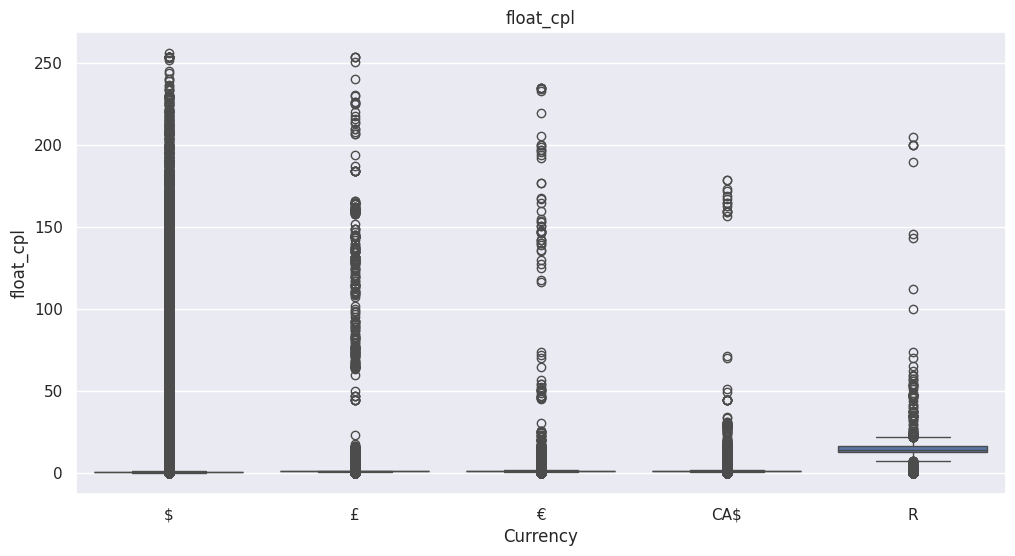

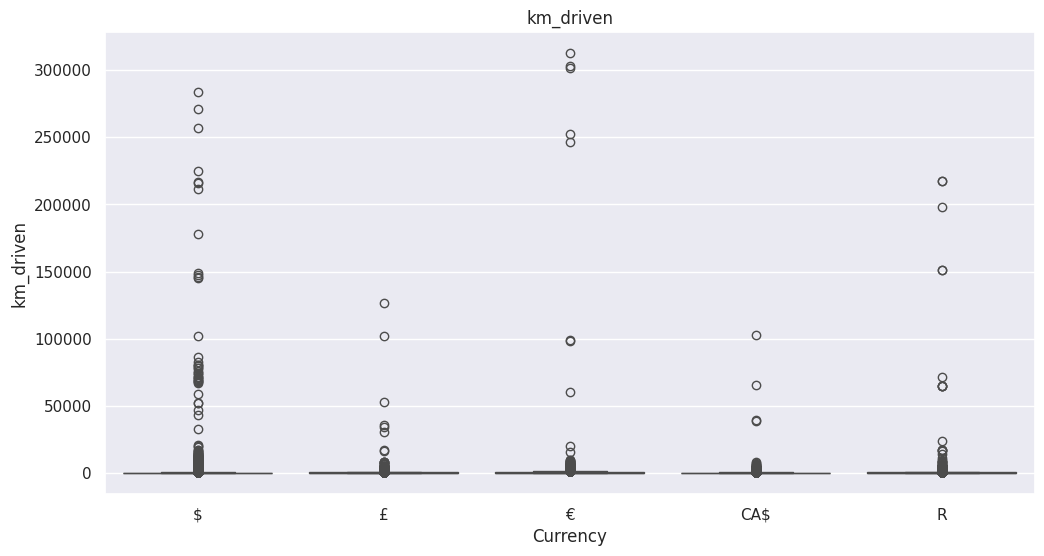

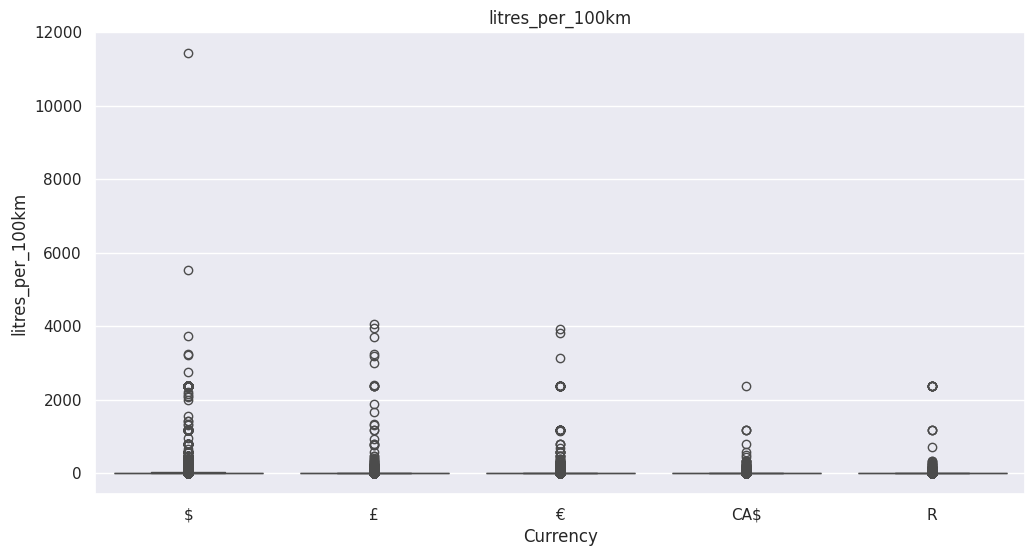

In [176]:
columns = ['litres_filled', 'float_tot_spent', 'float_cpl', 'km_driven', 'litres_per_100km']
for value in columns:
    plt.figure()             
    sns.boxplot(x="Currency", y=value, data=top_5_currency_data)
    plt.title(value)

IQR (Inter Quartile Range)

IQR is commonly used and most trusted to find outliers in statistics

For Dollars - $

In [178]:
df1 = top_5_currency_data[top_5_currency_data['Currency'].isin(['$'])]
len(df1)

741953

In [179]:
for column in df1[columns]:
    df1_Q1 = df1[column].describe()['25%']
 
    df1_Q3 = df1[column].describe()['75%']
    df1_IQR = df1_Q3 - df1_Q1

    # Any number greater than this is a suspected outlier.
    df1_ub = (df1_Q3 +1.5*df1_IQR)

    # Any number less than this is a suspected outlier.
    df1_lb = (df1_Q1 -1.5*df1_IQR)

    # remove outliers by taking values within the bounds
    df1 = df1[(df1[column] <= df1_ub) & (df1[column] >= df1_lb)]

/home/tarunaidoo/.local/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/tarunaidoo/.local/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


In [180]:
df1[columns].describe()

,litres_filled,float_tot_spent,float_cpl,km_driven,litres_per_100km
count,552309.0,552309.0,552309.0,552309.0,552309.0
mean,47.36771443219849,40.62532194840207,0.8634975190724042,439.4000743835787,11.354905291410047
std,14.744710462195219,15.203271745994414,0.2043151587777024,138.7343754183753,3.5975601619692505
min,2.751994366968,1.54,0.28239992397086067,16.0,0.5243173960366329
25%,37.17274371888,29.66,0.7262089719325501,347.5489600000001,8.82791927238806
50%,47.094308004744,39.24,0.8450863954937168,437.12,10.803115821917809
75%,56.978018172767996,50.09,0.9932869168666381,526.3104000000001,13.366567033898304
max,91.107290817312,88.72,1.4658907185353658,850.22784,24.211973611394363


In [181]:
len(df1)

552309

For Pounds £

In [182]:
df2 = top_5_currency_data[top_5_currency_data['Currency'].isin(['£'])] 
len(df2)

87587

In [183]:
for column in df2[columns]:
    df2_Q1 = df2[column].describe()['25%']
 
    df2_Q3 = df2[column].describe()['75%']
    df2_IQR = df2_Q3 - df2_Q1

    # Any number greater than this is a suspected outlier.
    df2_ub = (df2_Q3 +1.5*df2_IQR)

    # Any number less than this is a suspected outlier.
    df2_lb = (df2_Q1 -1.5*df2_IQR)

    # remove outliers by taking values within the bounds
    df2 = df2[(df2[column] <= df2_ub) & (df2[column] >= df2_lb)]

df2[columns].describe()

/home/tarunaidoo/.local/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/tarunaidoo/.local/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,litres_filled,float_tot_spent,float_cpl,km_driven,litres_per_100km
count,70409.0,70409.0,70409.0,70409.0,70409.0
mean,43.191129747789354,54.68891689982814,1.2667528473615985,574.9539471510744,7.960410890334079
std,14.212582553238526,18.846143117721166,0.13016726961201275,210.99932130194622,2.4638825101668824
min,0.098420706384,0.13,0.8638426112111454,1.6,0.06600101018240342
25%,32.959580403288,40.8,1.167640471423016,424.0,6.177238550913837
50%,43.36189198572,54.19,1.2680258513191123,555.2012800000001,7.439881650943395
75%,53.10932732952,67.62,1.357844349120883,718.6508800000001,9.301885323260867
max,85.78878726079199,111.59,1.6537170477620091,1197.42,16.881371160789474


For Euro - €

In [185]:
df3 = top_5_currency_data[top_5_currency_data['Currency'].isin(['€'])] 
len(df3)

59273

In [189]:
for column in df3[columns]:
    df3_Q1 = df3[column].describe()['25%']
 
    df3_Q3 = df3[column].describe()['75%']
    df3_IQR = df3_Q3 - df3_Q1

    # Any number greater than this is a suspected outlier.
    df3_ub = (df3_Q3 +1.5*df3_IQR)

    # Any number less than this is a suspected outlier.
    df3_lb = (df3_Q1 -1.5*df3_IQR)

    # remove outliers by taking values within the bounds
    df3 = df3[(df3[column] <= df3_ub) & (df3[column] >= df3_lb)]

df3[columns].describe()
# len(df3)

,litres_filled,float_tot_spent,float_cpl,km_driven,litres_per_100km
count,39781.0,39781.0,39781.0,39781.0,39781.0
mean,41.94128901362312,57.618255448580975,1.386213177605674,601.0210397526457,7.219741500404939
std,13.436826719994409,18.989211357428122,0.2128929459825429,206.02177626497306,1.7078967968143088
min,5.496417910368,6.5,0.8057247596923527,62.726400000000005,2.503579222222222
25%,32.978507462208,45.02,1.2389669255597162,458.18512000000004,5.9744504166666665
50%,42.135418567704,57.61,1.3789781133095347,592.076,6.986498259060402
75%,51.341540026392,70.69,1.5295561831536795,741.4046400000001,8.301341631578946
max,78.97126063780799,109.23,1.9654400695446244,1166.24,11.78949663172546


For CA

In [192]:
df4 = top_5_currency_data[top_5_currency_data['Currency'].isin(['CA$'])] 
len(df4)

46848

In [193]:
for column in df4[columns]:
    df4_Q1 = df4[column].describe()['25%']
 
    df4_Q3 = df4[column].describe()['75%']
    df4_IQR = df4_Q3 - df4_Q1

    # Any number greater than this is a suspected outlier.
    df4_ub = (df4_Q3 +1.5*df4_IQR)

    # Any number less than this is a suspected outlier.
    df4_lb = (df4_Q1 -1.5*df4_IQR)

    # remove outliers by taking values within the bounds
    df4 = df4[(df4[column] <= df4_ub) & (df4[column] >= df4_lb)]

df4[columns].describe()

/home/tarunaidoo/.local/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/tarunaidoo/.local/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,litres_filled,float_tot_spent,float_cpl,km_driven,litres_per_100km
count,37846.0,37846.0,37846.0,37846.0,37846.0
mean,44.0330564173655,57.39868968979549,1.3090742207188526,423.02273671193785,10.935978851399524
std,13.69295841667708,19.8702651390208,0.23130306886437732,137.12281101193625,3.2783349447502106
min,3.573428724096,4.8,0.6683552924661155,26.758080000000003,0.9457562543568726
25%,34.738723941768,43.1125,1.1491484277579456,331.22880000000004,8.55073832717888
50%,43.869137164776,56.25,1.3102933796964162,420.04584,10.515032733333332
75%,53.29859791872,70.62,1.4529462879698163,509.72212,12.866210263703653
max,84.83107807944,115.22,1.9284559822144833,823.68,22.11105014018692


For Rands - R

In [195]:
df5 = top_5_currency_data[top_5_currency_data['Currency'].isin(['R'])] 
len(df5)

36424

In [196]:
for column in df5[columns]:
    df5_Q1 = df5[column].describe()['25%']
 
    df5_Q3 = df5[column].describe()['75%']
    df5_IQR = df5_Q3 - df5_Q1

    # Any number greater than this is a suspected outlier.
    df5_ub = (df5_Q3 +1.5*df5_IQR)

    # Any number less than this is a suspected outlier.
    df5_lb = (df5_Q1 -1.5*df5_IQR)

    # remove outliers by taking values within the bounds
    df5 = df5[(df5[column] <= df5_ub) & (df5[column] >= df5_lb)]
    
df5[columns].describe()

/home/tarunaidoo/.local/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/tarunaidoo/.local/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,litres_filled,float_tot_spent,float_cpl,km_driven,litres_per_100km
count,27758.0,27758.0,27758.0,27758.0,27758.0
mean,49.458911337496644,519.1328154045681,14.842777709877543,517.5495200576411,10.013229064304351
std,17.534207907771137,301.5040572399834,2.685194495309373,178.15433512579548,3.219721483328888
min,0.060566588544,0.79,7.299073806655641,0.96,0.17737596562293276
25%,36.941833600056,349.03999999999996,12.84932862670034,397.6386,7.771101191702154
50%,48.987013896743996,576.565,14.471345028179371,513.3688,9.539848245967741
75%,60.899704780992,750.5174999999999,16.4790526261013,632.9946000000001,11.597462573529413
max,102.21368899156799,999.99,21.96854787410362,1093.928,24.0445302565723


After removing outliers

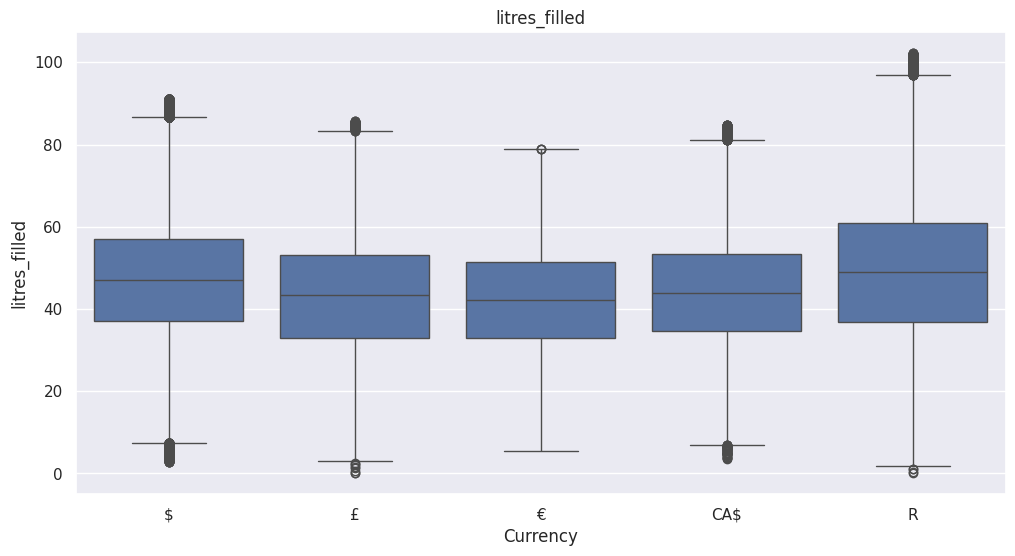

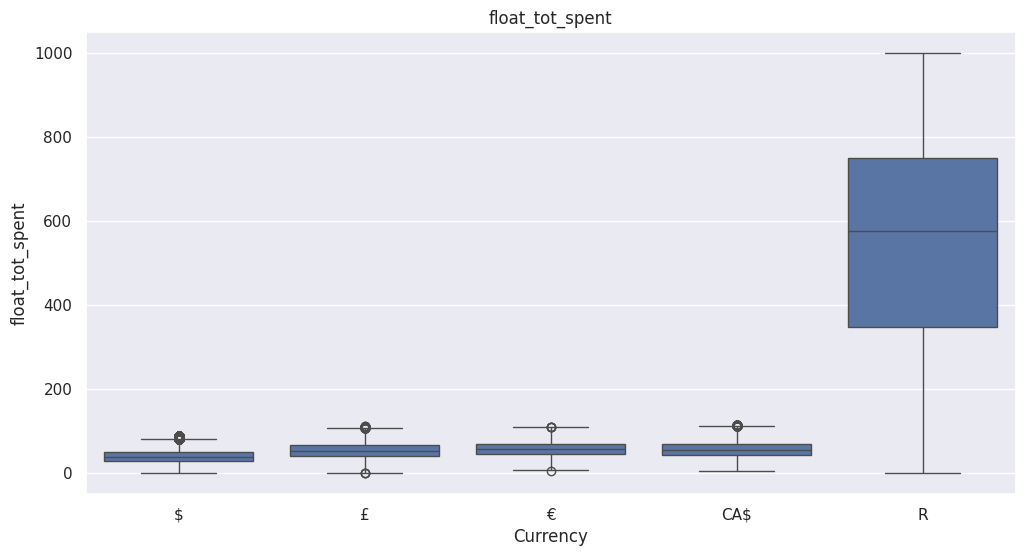

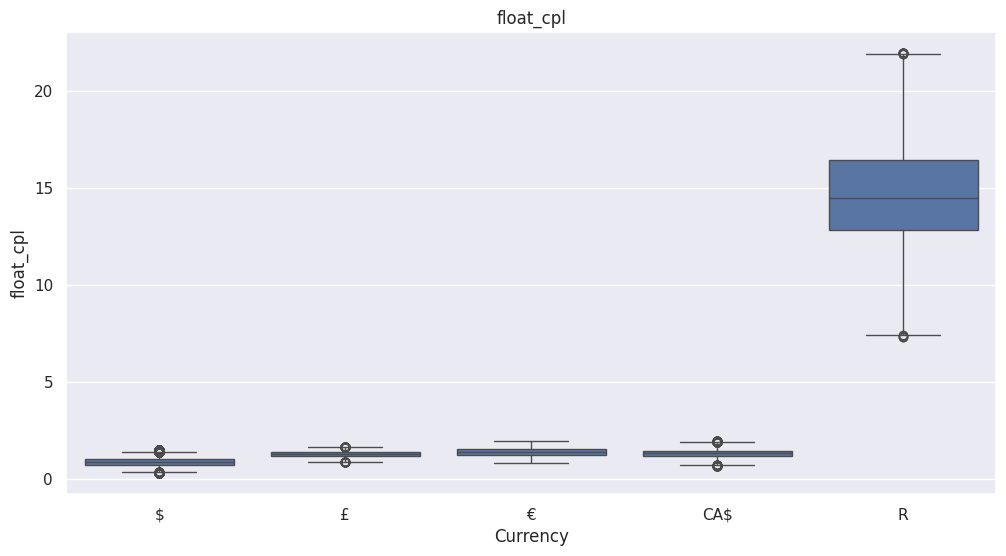

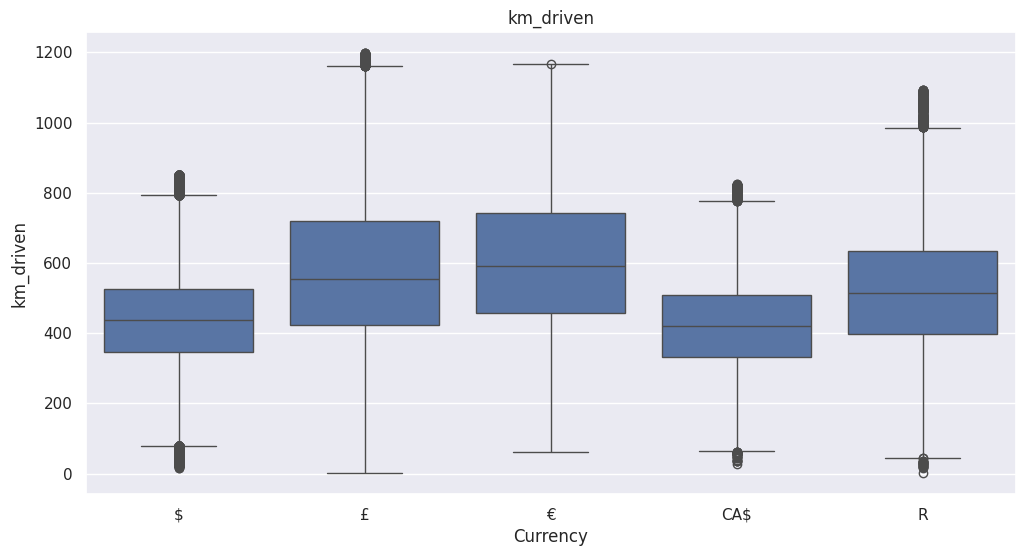

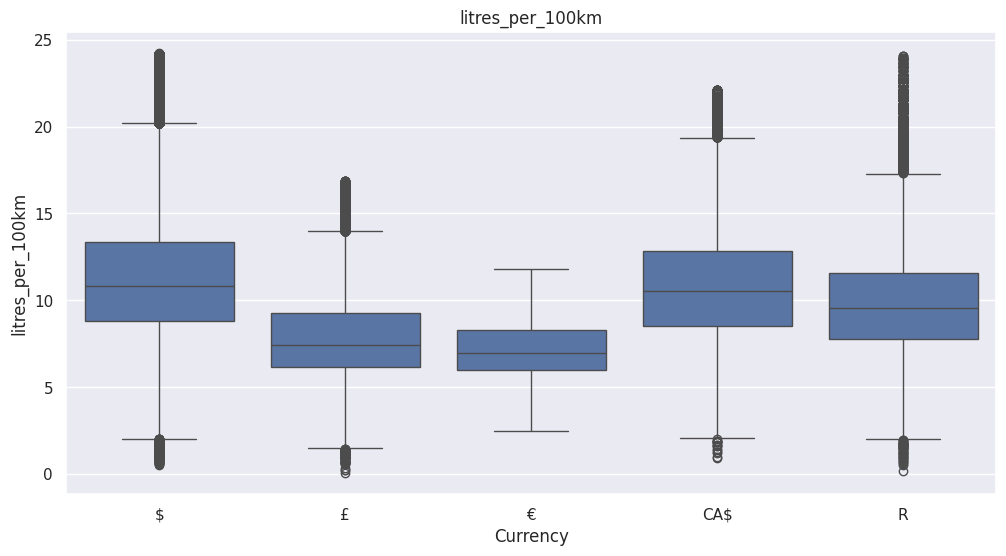

In [198]:
top_5_currency_data_removed_outliers = pd.concat([df1, df2, df3, df4, df5], axis=0)

for value in columns:
    plt.figure()             
    sns.boxplot(x="Currency", y=value, data=top_5_currency_data_removed_outliers)
    plt.title(value)

3. How many values have been removed after accounting for outliers? [1]

In [200]:
values_removed = len(top_5_currency_data) - len(top_5_currency_data_removed_outliers)
print("Number of Values removed after accounting for outliers:", values_removed)

Number of Values removed after accounting for outliers: 243982


In [201]:
print("Percentage of removed values:", values_removed/len(top_5_currency_data) * 100)

Percentage of removed values: 25.098833949706044


#### 4.2. Fuel Efficiency

In [202]:
len(top_5_currency_data_removed_outliers)

728103

In [203]:
top_5_currency_data_removed_outliers.head()

,user_ID,date_fueled,date_captured,odometer,gallons,cost_per_gallon,float_cpg,total_spent,Currency,float_tot_spent,...,miles,user_url,car_make,car_model,car_year,litres_filled,km_driven,litres_per_100km,vehicle_age,float_cpl
4,1038865,2022-02-15,2022-02-15,NaN,11.651,$3.029,3.029,$35.29,$,35.29,...,244.4,https://www.somewebsite.com/honda/passport/201...,honda,passport,2019.0,44.103832695384,391.04,11.278598786667347,3.0,0.8001771465928316
5,445811,2021-10-23,2021-10-23,147567.0,3.413,$3.739,3.739,$12.76,$,12.76,...,98.97699999999999,https://www.somewebsite.com/volkswagen/passat/...,volkswagen,passat,2004.0,12.919610418791999,158.3632,8.158215051724136,17.0,0.9877393037671169
6,529810,2021-11-20,2021-12-12,105929.0,9.044,$4.639,4.639,$41.96,$,41.96,...,266.798,https://www.somewebsite.com/mazda/3_sport/2010...,mazda,3_sport,2010.0,34.235264174496,426.8768,8.019940220338984,11.0,1.2254941508894506
7,1087864,2022-01-20,2022-01-20,59475.0,14.962,$2.929,2.929,$43.82,$,43.82,...,408.4626,https://www.somewebsite.com/subaru/forester/20...,subaru,forester,2020.0,56.637331112207995,653.54016,8.666235769230768,2.0,0.7737599413570166
11,968116,2022-01-14,2022-01-14,22823.0,13.761,$2.599,2.599,$35.76,$,35.76,...,288.981,https://www.somewebsite.com/honda/pilot/2019/9...,honda,pilot,2019.0,52.091051559624,462.3696,11.266106500000001,3.0,0.6865831640788278


1. Look at the difference in cost per litre per country for January 2022 -
use the average currency conversion rate to Rands (quote your values and
source). Are there any notable differences? Discuss reasons why this
may/may not be the case. [5]

In [205]:
# copying top 5 currency dataframe
df_copy = top_5_currency_data_removed_outliers.copy()

In [206]:
# Creating a rands conversion column 
df_copy['cpl_rands'] = df_copy['float_cpl']

In [210]:
# Converting currencies to Rands using the  average currency conversion rate to Rands
# These are the exchange rates as off 2 Sept 2025 @ 14:55

# average dollar rand exchange rate: 17.62 ZAR
df_copy['cpl_rands'][df_copy['Currency'].isin(['$'])] = df_copy['cpl_rands']*17.62

# average Pound Sterling rand exchange rate: 23,71 ZAR
df_copy['cpl_rands'][df_copy['Currency'].isin(['£'])] = df_copy['cpl_rands']*23.71

# average Euro rand exchange rate: 20,64 ZAR
df_copy['cpl_rands'][df_copy['Currency'].isin(['€'])] = df_copy['cpl_rands']*20.64 

# average Canadian dollar rand exchange rate: 12,87 ZAR
df_copy['cpl_rands'][df_copy['Currency'].isin(['CA$'])] = df_copy['cpl_rands']*12.87

In [211]:
currency_values = ['R', '$', '£', '€', 'CA$']

January 2022

In [212]:
# Filtering out January 2022
jan_22_df = df_copy[df_copy['date_fueled'].dt.to_period('M') == '2022-01']

<Axes: xlabel='Currency', ylabel='cpl_rands'>

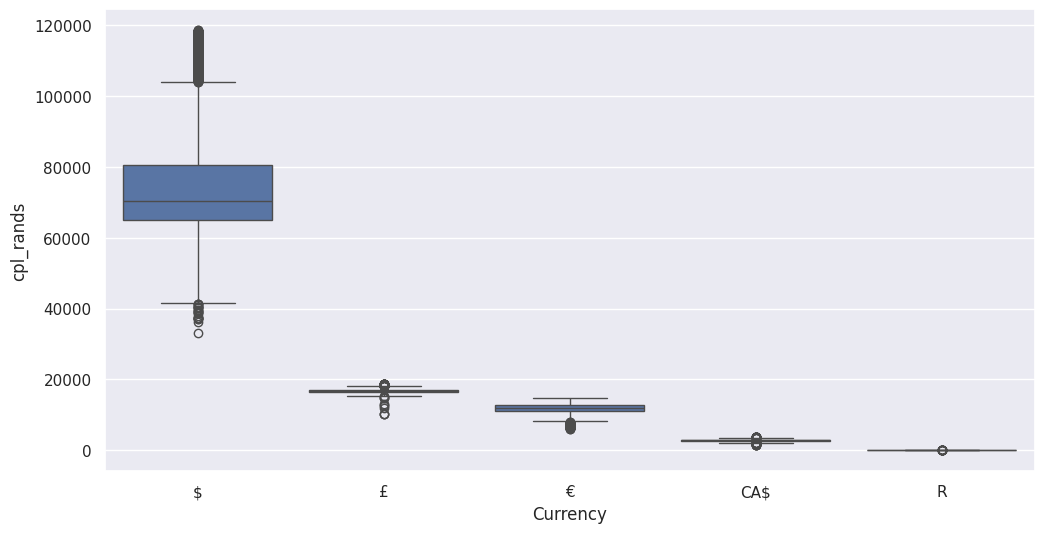

In [213]:
# Boxplot to observe the difference in cost per litre per country for January 2022
sns.boxplot(x="Currency", y='cpl_rands', data=jan_22_df)

In [214]:
for cv in currency_values:
    print(cv, "\n",jan_22_df['cpl_rands'][jan_22_df['Currency'].isin([cv])].describe())

R 
 count                730.0
mean    18.912974689538817
std     0.8352445540143704
min     15.150267202739812
25%      18.58450388339574
50%      19.05473013659325
75%     19.515049937827317
max      20.79034052058628
Name: cpl_rands, dtype: float64
$ 
 count              30552.0
mean      74183.9966421989
std     12966.399438685026
min     33110.017452966145
25%      64958.90448002848
50%      70516.42839079103
75%      80562.72161409259
max      118610.3853108516
Name: cpl_rands, dtype: float64
£ 
 count                897.0
mean     16713.47694524005
std      774.5342825208747
min     10268.051107344996
25%     16338.281320804834
50%     16670.482974277762
75%     17032.884778066407
max     18844.893797009645
Name: cpl_rands, dtype: float64
€ 
 count                812.0
mean     11779.67379405422
std     1686.6384904483323
min      6100.401568190396
25%     10980.722822742711
50%     11984.337274283711
75%     12869.879437408124
max      14640.96376365695
Name: cpl_rands, dtype: 

2. Looking at the odometer readings, find examples of where users have
missed logging a fill-up. Give a basic rule for identifying this, and es-
timate how many there are in the dataset. [5]

3. Plot the average distance (in km) per tank per country. Which country
has the largest average distance? Provide some explanations for why this
might be the case. [5]


4. Do newer vehicles drive further distances between fill-ups? Provide a plot
to show this. [4]

5. Take the top 5 most popular vehicles in SA (ie, those with currency set
to R). Compute their fuel efficiency and discuss whether these values are
realistic. [3]


6. Which vehicles are the most fuel efficient in each country? (Make sure the
values are reasonable!!! You can look up values of fuel efficiency online
to do a sanity check, but a value of 1l per 100km, or 100l per 100km are
clearly wrong). [5]

#### 4.3. Fuel Usage in SA

1. Filter the above dataset to focus on SA drivers. [1]
2. Plot the fuel prices over time for SA. [2]
3. Using a suitable plot, show if the difference in the number of people refu-
eling on a Tuesday vs other days. [3]
4. Now reduce your dataset to only the entries on the 1st Tuesday and 1st
Wednesday in SA every month. [2]
5. For each Tuesday and Wednesday, add an indicator for whether the price
goes up or the price goes down that month. [4]
6. Do more people refuel on the first Wednesday of the month when the
prices goes down? [2]
7. Do more people refuel on the first Tuesday of the month when the prices
goes up? [2]